# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [2]:
x = sym.Symbol('x')

In [3]:
a = sym.tan(sym.sin(x) + sym.cos(2*x + 3))**2
a

tan(sin(x) + cos(2*x + 3))**2

In [4]:
diff = sym.diff(a, x)
diff

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [5]:
res = diff.subs(x, 1)
res

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

In [6]:
float(res)

55.3859176353379

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

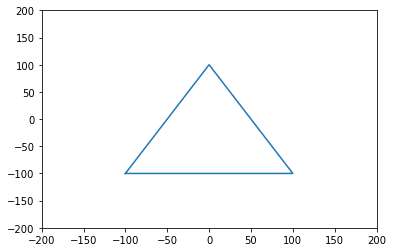

In [7]:
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


(-200.0, 200.0)

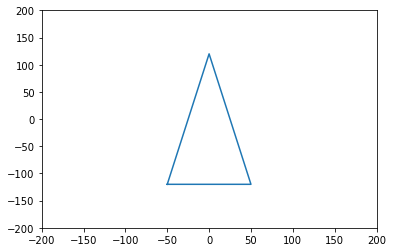

In [8]:
x_scale, y_scale = 0.5, 1.2

B1 = np.array([[x_scale, 0, 0], [0, y_scale, 0], [0, 0, 1]])

A1 = np.array((B1@A.transpose()).transpose())
x1 = A1[:,0]
y1 = A1[:,1]

plt.plot(x1, y1)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

(0.0, 400.0)

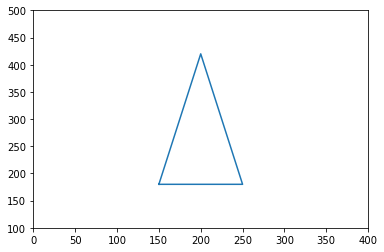

In [9]:
x_shift, y_shift = 200, 300

B2 = np.array([[x_shift, y_shift, 0]])

A2 = np.array(B2 + A1)
x2 = A2[:,0]
y2 = A2[:,1]

plt.plot(x2, y2)
plt.ylim([-200+y_shift, 200+y_shift])
plt.xlim([-200+x_shift, 200+x_shift])

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [10]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [11]:
lam, u = np.linalg.eig(m)

print('lambdas:\n', lam, '\n')
print('u:\n', u)

lambdas:
 [ 3. -1.] 

u:
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [12]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [13]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

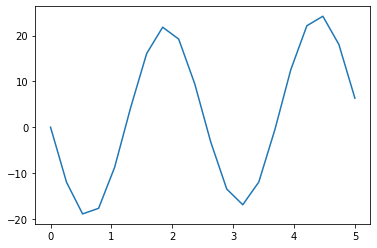

In [14]:
plt.plot(x, fx)
plt.show()

In [15]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [16]:
from scipy.optimize import curve_fit

In [17]:
a_range = np.arange(0, 2, 0.1)
b_range = np.arange(0, 2, 0.1)

best_params = None
best_rmse = float('inf')

for a in a_range:
    for b in b_range:
        params, _ = curve_fit(f, x, fx, [a, b])
        rmse = error(params)
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = params

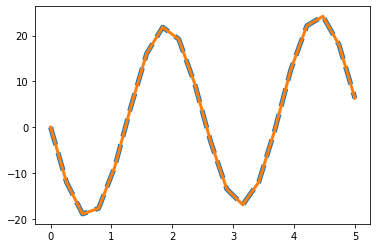

In [18]:
plt.plot(x, fx, lw=5, ls='--')
plt.plot(x, f(x, best_params[0], best_params[1]), lw=3)
plt.show()

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [19]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [20]:
def angle(a, b):
    aLength = np.linalg.norm(a)
    bLength = np.linalg.norm(b)
    return np.arccos(np.dot(a, b) / (aLength * bLength)) * 180 / np.pi

In [21]:
for user_a in range(len(ratings)):
    min_angle = 360
    for user_b in range(len(ratings)):
        if user_a != user_b:
            ang = angle(ratings[user_a], ratings[user_b])
            if ang < min_angle:
                min_angle = ang
                b = user_b
    print((user_a, b))

(0, 8)
(1, 4)
(2, 9)
(3, 9)
(4, 8)
(5, 9)
(6, 3)
(7, 5)
(8, 0)
(9, 2)
